# The Engineering World - A Place For Learning And Exploring

## Fitting model To Data

Standard imports

In [6]:
import math

In [7]:
import numpy as np
import pandas as pd

In [8]:
import matplotlib
import matplotlib.pyplot as pp

In [9]:
%matplotlib inline

In [10]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [11]:
gapminder = pd.read_csv('gapminder.csv')

In [12]:
gdata = gapminder.query('year == 1985')

In [13]:
size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

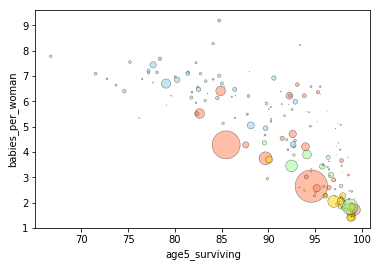

In [14]:
plotdata()

In [17]:
model = smf.ols(formula='babies_per_woman ~ 1', data=gdata)

In [18]:
grandmean = model.fit()

In [19]:
grandmean

In [22]:
def plotfit(fit):
    plotdata()
    pp.scatter(gdata.age5_surviving,fit.predict(gdata),
              c=colors, s=30, linewidths=0.5, edgecolor='k', marker='D')

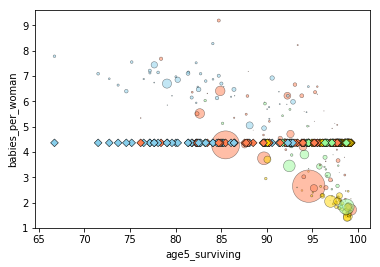

In [23]:
plotfit(grandmean)

In [24]:
grandmean.params

Intercept    4.360714
dtype: float64

In [25]:
gdata.babies_per_woman.mean()

4.360714285714285

In [26]:
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region', data=gdata).fit()

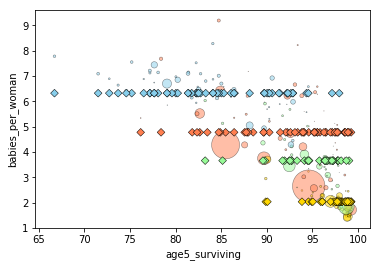

In [27]:
plotfit(groupmeans)

In [28]:
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [29]:
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region', data=gdata).fit()

In [30]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [31]:
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [33]:
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving', data=gdata).fit()

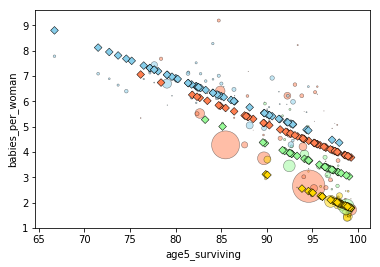

In [34]:
plotfit(surviving)

In [35]:
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [36]:
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region', data=gdata).fit()

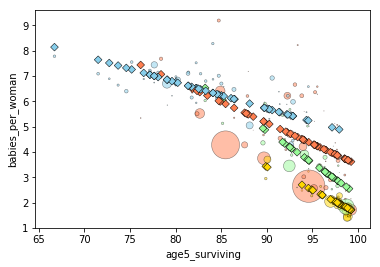

In [37]:
plotfit(surviving_byregion)

In [38]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [39]:
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population', data=gdata).fit()

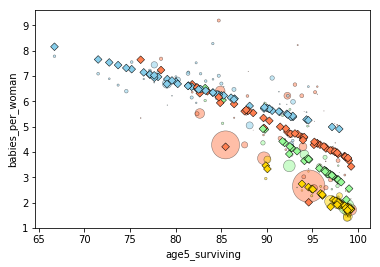

In [40]:
plotfit(surviving_byregion_population)